In [1]:
import os
print(os.getcwd())
print('Inicio del Jupyter File.')

c:\Users\andre\OneDrive\Programación-Datos\Proyectos para portfolio-ideas\ADR Index para acciones argentinas
Inicio del Jupyter File.


# ArgDR Index para monitorear el interés internacional en la economía argentina

*Por Andrés Fernández Apenburg*

*Licenciado en Economía, Universidad de Buenos Aires*

## Introducción
Existe una clase de activos financieros llamados ADR (del inglés American Drawing Right). Un ADR es un certificado de titularidad, por parte de un residente estadounidense, de una acción de una empresa cuyas acciones cotizan en un mercado fuera de EEUU. En el caso argentino, se trata de certificados de titularidad de acciones que cotizan en la Bolsa de Comercio de Buenos Aires (BCBA). La compraventa de los ADR argentinos tiene lugar en la Bolsa de Comercio de Nueva York (NYSE) y los valores se expresan en dólares estadounidenses. Existen ADR para múltiples empresas importantes de Argentina, como YPF, Grupo Galicia, e IRSA. 

La cotización de los ADR argentinos es seguida atentamente por los medios de comunicación financieros del país y el exterior, ya que provee una valiosa señal de las expectativas futuras de generación de dólares por parte del sector privado argentino. Sin embargo, no se cuenta con un índice que permita sintetizar el conjunto de los precios, es decir, una única variable numérica, cuya variación día a día refleje la tendencia general de los precios de los múltiples ADR argentinos. 


## La solución propuesta


### Qué buscamos en un índice
Las propiedades deseables de un índice incluyen:
1. Que varíe su valor si varía el estado del fenómeno subyacente a medir (en este caso, las tendencias *generales* del valor de los ADR en su conjunto)
2. Que no se vea afectado por *outliers* (en este caso, firmas pequeñas que aumenten su valor accionario en proporciones mucho mayores que la tendencia general en el resto de las firmas)



### Definición del índice
El Índice ArgDR está definido como un promedio ponderado de todos los precios de ADR argentinos, donde los ponderadores sugeridos son la capitalización de mercado de cada firma como porcentaje de la capitalización bursátil colectiva del total de las firmas incluidas. 
Formalmente, dada una cantidad $N$ de ADR argentinos cotizando en el instante o periodo $t$ (por ejemplo, el inicio o cierre de la jornada, o las 12 del mediodía, o un cierto período sobre el cual se toman valores promedio para todos los activos), el índice queda definido como: 

$$ 
ArgDR_{t} = \sum_{i=1}^{N} A_{i, t} \cdot P_{i, t}
$$

Donde $A_{i,t}$ es la cotización en dólares del ADR $i$ en $t$, y $P_{i,t}$ es el ponderador del ADR $i$ en la jornada $t$, definido como:

$$
P_{i, t}=\frac{C_{i, t}}{\sum_{i}^{N}C_{i, t}}
$$

Donde ${C_{i, t}}$ es la capitalización bursátil de la empresa $i$, es decir, su número total de acciones multiplicado por $A_{i, t}$.

Bajo esta definición se cumple que $\sum_{i}^{N}P_{i,t} = 1$, para todo $t$, por lo que se trata de un conjunto válido de ponderadores.

En la práctica, el ponderador se puede tomar como fijo a lo largo de múltiples $t$ (índice tipo Laspeyres), utilizando, por ejemplo, las capitalizaciones bursátiles al cierre del trimestre anterior para calcular los ponderadores, de forma tal que resulta opcional su actualización diaria. 


### Por qué nuestro índice satisface las propiedades deseadas
1. Al tratarse de un promedio ponderado de precios de acciones individuales, si suben todas las acciones, necesariamente debe subir el valor del índice
2. Si una firma es más relevante en el mercado (medido en términos de la capitalización bursátil, esto es, del valor implícito de la compañía en función de la cantidad de acciones y su precio), el índice responderá con un mayor cambio porcentual ante la misma variación porcentual en el valor de dicho activo en comparación con una firma menos relevante, porque el valor de su ponderador será mayor.

# Obtención de los datos

## Web scraping desde investing.com


Descargamos un archivo CSV con la tabla que tiene investing.com mostrando las cotizaciones de ADR argentinos, el cual se puede descargar desde [esta](https://www.investing.com/equities/argentina-adrs) web.

Decidimos remover MercadoLibre de nuestro índice, ya que no es un ADR propiamente dicho (no cotiza en la BCBA salvo como CEDEAR) y sus resultados financieros dependen principalmente de sus actividades fuera de la Argentina, factores que las distinguen de todos los demás activos considerados.

In [2]:
import pandas as pd


#Cargamos datos de distintas fechas para evaluar robustez

ADRs_20230703 = 'Data\Arg_ADRs_2023_07_03.csv'
ADRs_20240102 = 'Data\Arg_ADRs_2024_01_02.csv'
ADRs_20240201 = 'Data\Arg_ADRs_2024_02_01.csv'
ADRs_20240221 = 'Data\Arg_ADRs_2024_02_21.csv'
ADRs_20240223 = 'Data\Arg_ADRs_2024_02_23.csv'
latest = 'Data\Argentina ADRs.csv'


def generar_tabla(csvfile):
    
    import pandas as pd

    tablaADR = pd.read_csv(csvfile)

    tablaADR = pd.DataFrame(tablaADR)

    tablaADR.set_index('Name', inplace = True)

    #print(tablaADR.index.values)

    # Removemos MercadoLibre (MELI) de la tabla y creamos una 'tablaADR_sinMELI'

    tablaADR_sinMELI = tablaADR.drop(['MercadoLibre'])

    #print(tablaADR_sinMELI.index.values)

    tablaADR_sinMELI = tablaADR_sinMELI.sort_values(by ='Name')

    
    

    return tablaADR_sinMELI

generar_tabla(latest)


<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:10: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:10: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
C:\Users\andre\AppData\Local\Temp\ipykernel_21472\4278021568.py:6: SyntaxWarning: invalid escape sequence '\A'
  ADRs_20230703 = 'Data\Arg_ADRs_2023_07_03.csv'
C:\Users\andre\AppData\Local\Temp\ipykernel_21472\4278021568.py:7: SyntaxWarning: invalid escape sequence '\A'
  ADRs_20240102 = 'Data\Arg_ADRs_2024_01_02.csv'
C:\Users\andre\AppData\Local\Temp\ipykernel_21472\4278021568.py:8: SyntaxWar

,Last,High,Low,Chg.,Chg. %,Vol.,Time
Name,,,,,,,
BBVA Argentina,10.700,11.368,10.510,-0.620,-5.48%,1.36M,16:00:00
Banco Macro B ADR,60.67,64.70,59.62,-3.980,-6.16%,550.89K,16:00:00
Bioceres Crop,11.08,11.39,10.97,-0.030,-0.27%,66.21K,16:00:59
Central Puerto,9.600,10.210,9.460,-0.490,-4.86%,390.72K,16:00:00
Cresud SACIF,9.870,10.090,9.840,-0.200,-1.99%,464.08K,16:00:59
Despegar.com,15.00,15.34,14.61,0.230,1.56%,1.47M,16:00:00
Edenor ADR,16.920,17.668,16.680,-1.190,-6.57%,151.54K,16:00:00
Grupo Financiero Galicia ADR,33.580,36.000,33.270,-2.600,-7.19%,1.43M,16:00:59
Grupo Supervielle,7.010,7.490,6.810,-0.500,-6.66%,1.64M,16:00:00


## Cálculo de los ponderadores

Obtenemos la capitalización bursátil de cada firma de la web [https://www.nasdaq.com/market-activity/stocks](https://www.nasdaq.com/market-activity/stocks) al 21 de febrero del 2024. El programa es lo suficientemente flexible para admitir la modificación de los ponderadores en una fecha futura, si la trayectoria de las capitalizaciones bursátiles hace variar la importancia relativa de cada firma.

In [3]:
cap_bursatiles_feb24 = {
    'YPF Sociedad Anonima' : 6669706272,
    'Grupo Supervielle' : 379972012,
    'Grupo Financiero Galicia ADR' : 3064410163,
    'BBVA Argentina' : 1169255067,
    'Banco Macro B ADR' : 2153544365,
    'Telecom Argentina ADR' : 3303757407,
    'Cresud SACIF' : 495623283,
    'Central Puerto' : 1268750654,
    'Pampa Energia ADR' : 2326836834,
    'Loma Negra ADR' : 757609060,
    'Despegar.com' : 564813000,
    'IRSA ADR' : 564813000,
    'Transportadora Gas ADR' : 1981267110,
    'Bioceres Crop' : 806938546,
    'Edenor ADR' : 858866207}

cap_bursatiles = cap_bursatiles_feb24

print('length: ', len(cap_bursatiles))

suma_cap = sum(cap_bursatiles.values())

print(f'Las capitalizaciones suman {suma_cap}')

firmas_y_pond = []

for i in cap_bursatiles:
    firmas_y_pond.append([i, (cap_bursatiles[i]/suma_cap)])

ponderadores = dict(firmas_y_pond)


print()
print()
print()

print('PONDERADORES:')
for i in ponderadores:
    print(i, ':', round(ponderadores[i], 3))


print()
print()


print(f'Los ponderadores suman {round(sum(ponderadores.values()), 2)}, como corresponde.')



length:  15
Las capitalizaciones suman 26366162980



PONDERADORES:
YPF Sociedad Anonima : 0.253
Grupo Supervielle : 0.014
Grupo Financiero Galicia ADR : 0.116
BBVA Argentina : 0.044
Banco Macro B ADR : 0.082
Telecom Argentina ADR : 0.125
Cresud SACIF : 0.019
Central Puerto : 0.048
Pampa Energia ADR : 0.088
Loma Negra ADR : 0.029
Despegar.com : 0.021
IRSA ADR : 0.021
Transportadora Gas ADR : 0.075
Bioceres Crop : 0.031
Edenor ADR : 0.033


Los ponderadores suman 1.0, como corresponde.


# Cómputo del índice

Teniendo los datos de precios y los ponderadores, podemos calcular el índice ArgDR para el 21-02-2024 (ya que tenemos los datos de precios para esa fecha y los ponderadores que se reutilizan de jornada en jornada, actualizándose únicamente a mediano plazo)

In [4]:
def preciosypond(csvfile):
    generar_tabla(csvfile)
    ponderadores_df = pd.DataFrame(ponderadores.values(), index=ponderadores.keys())
    ponderadores_df = ponderadores_df.sort_index()
    #print(ponderadores_df)
    datos_df = generar_tabla(csvfile)
    precios_y_pond = ponderadores_df.merge(datos_df, left_on=ponderadores_df.index, right_on = 'Name')
    precios_y_pond.rename(columns = {0 : 'Ponderador'}, inplace=True)
    precios_y_pond.to_csv('Data\preciosponddf.csv')
    return precios_y_pond

'''
Podemos ver que, al fluctuar los precios de las acciones, los datos provenientes 
 del primer archivo difieren de los del segundo
'''

#print(preciosypond(ADRs_20240201).sort_values(by='Ponderador', ascending = False))



preciosypond(latest).sort_values(by='Ponderador', ascending = False)


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\andre\AppData\Local\Temp\ipykernel_21472\3900223888.py:9: SyntaxWarning: invalid escape sequence '\p'
  precios_y_pond.to_csv('Data\preciosponddf.csv')


,Name,Ponderador,Last,High,Low,Chg.,Chg. %,Vol.,Time
14,YPF Sociedad Anonima,0.252965,21.750,23.350,21.590,-1.780,-7.56%,3.22M,16:00:00
12,Telecom Argentina ADR,0.125303,8.650,9.150,8.510,-0.520,-5.67%,244.05K,16:00:00
7,Grupo Financiero Galicia ADR,0.116225,33.580,36.000,33.270,-2.600,-7.19%,1.43M,16:00:59
11,Pampa Energia ADR,0.088251,45.02,47.24,44.90,-2.250,-4.76%,266.73K,16:00:00
1,Banco Macro B ADR,0.081678,60.67,64.70,59.62,-3.980,-6.16%,550.89K,16:00:00
13,Transportadora Gas ADR,0.075144,18.223,19.210,17.870,-1.167,-6.02%,275.13K,16:00:00
3,Central Puerto,0.048120,9.600,10.210,9.460,-0.490,-4.86%,390.72K,16:00:00
0,BBVA Argentina,0.044347,10.700,11.368,10.510,-0.620,-5.48%,1.36M,16:00:00
6,Edenor ADR,0.032575,16.920,17.668,16.680,-1.190,-6.57%,151.54K,16:00:00
2,Bioceres Crop,0.030605,11.08,11.39,10.97,-0.030,-0.27%,66.21K,16:00:59


In [5]:
from datetime import datetime
import os
import time

def fechacsv(csvfile) :
    creationdate = str(datetime.fromtimestamp(os.path.getctime(csvfile)))
    return creationdate[0:16]

print(fechacsv(latest))

2024-05-22 17:00


In [6]:





def calculo_indice(col, csvfile):
    precios_y_pond = preciosypond(csvfile)
    vector_pond = pd.Series(precios_y_pond['Ponderador'])
    #print(vector_pond)
    vector_ult_precio = pd.Series(precios_y_pond[col], dtype='float')
    #print(vector_ult_precio)
    ArgDR_Index = vector_pond.dot(vector_ult_precio)
    #print(f'El índice ArgDR ({col}) el día {fechacsv(csvfile)} vale {round(ArgDR_Index, 3)} puntos')
    return ArgDR_Index




#calculo_indice('Last', ADRs_20240221)
#calculo_indice('Low',  ADRs_20240221)
#calculo_indice('High', ADRs_20240221)
print('2023-07-03: ' , calculo_indice('Last', ADRs_20230703))



adr20240102 = calculo_indice('Last', ADRs_20240102)
adr20240221 = calculo_indice('Last', ADRs_20240221)
adr20240223 = calculo_indice('Last', ADRs_20240223)

def printrnd3(float):
    print(round((float), 3))

#print(adr20240223)
#printrnd3(adr20240223)
#printrnd3(adr20240224)
printrnd3(calculo_indice('Last',latest))

2023-07-03:  15.790447112228234
23.649


# Serie histórica

Creamos un archivo CSV denominado 'Serie_Historica_ArgDR', y una función para agregarle registros con el valor computado del índice en la fecha correspondiente. De esta forma, almacenamos una serie de tiempo en un CSV, lo cual nos permite guardar información histórica sobre la evolución del índice a lo largo del tiempo.

In [7]:
csv_serie_hist = 'Data\Serie_Historica_ArgDR.csv'

def registrar(csvfile):
    global fecha
    global valor
    fecha = fechacsv(csvfile)
    valor = calculo_indice('Last', csvfile)
    registro = {'fecha':[fecha], 'valor': [valor]}
    registro = pd.DataFrame(data=registro)
    print(registro)
    registro.to_csv(csv_serie_hist, mode='a', header=False, index=False)

registrar(latest)



              fecha      valor
0  2024-05-22 17:00  23.648553


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\andre\AppData\Local\Temp\ipykernel_21472\1151360288.py:1: SyntaxWarning: invalid escape sequence '\S'
  csv_serie_hist = 'Data\Serie_Historica_ArgDR.csv'


Además de registrar esta actualización en el archivo 'Data\Serie_Historica_ArgDR.csv', también la podemos registrar en una base de datos MySQL. 

In [8]:

import mysql.connector as sql


cnx = sql.connect(user = 'root', password = '', host = 'localhost', database = 'argdr')
cursor = cnx.cursor()

actualizar_serie = ("INSERT INTO argdr_seriehistorica"
                    "(Fecha,Valor)"
                    "VALUES(%s,%s)")
dato_update = (fecha, valor)



cursor.execute(actualizar_serie,dato_update)


cnx.commit()
cursor.close()
cnx.close()


In [9]:
import mysql.connector as sql
import pandas as pd

cnx = sql.connect(user = 'root', password = '', host = 'localhost', database = 'argdr')
cursor = cnx.cursor()
cursor.execute('SELECT * FROM argdr_seriehistorica')
result = cursor.fetchall()
result = pd.DataFrame(result, )
result.rename(columns={0: 'Fecha', 1: 'Valor'}, inplace=True)
result.set_index('Fecha', inplace=True)
cursor.close()
cnx.close()
#result



In [10]:
serievalores = list(pd.Series(result['Valor']))
print(serievalores[-1])
variacion_pct_ultima = ((serievalores[-1]/serievalores[-2])-1)*100
variacion_pct_20240101 = ((serievalores[-1]/serievalores[1])-1)*100

print(f'El ArgDR Index varió un {round(variacion_pct_ultima, 3)}% desde la jornada anterior.')
print(f'El ArgDR Index varió un {round(variacion_pct_20240101, 3)}% desde el 1 de enero de 2024.')


23.6485532229233
El ArgDR Index varió un -6.125% desde la jornada anterior.
El ArgDR Index varió un 37.472% desde el 1 de enero de 2024.


Fecha
2023-07-03 23:59:00    15.790400
2024-01-02 23:59:00    17.202437
2024-02-01 23:59:00    17.984130
2024-02-21 18:58:00    17.569293
2024-02-23 20:15:00    18.555700
                         ...    
2024-05-16 21:50:00    25.460975
2024-05-17 21:45:00    25.308948
2024-05-20 22:35:00    25.686957
2024-05-21 21:20:00    25.191645
2024-05-22 17:00:00    23.648553
Name: Valor, Length: 73, dtype: float64


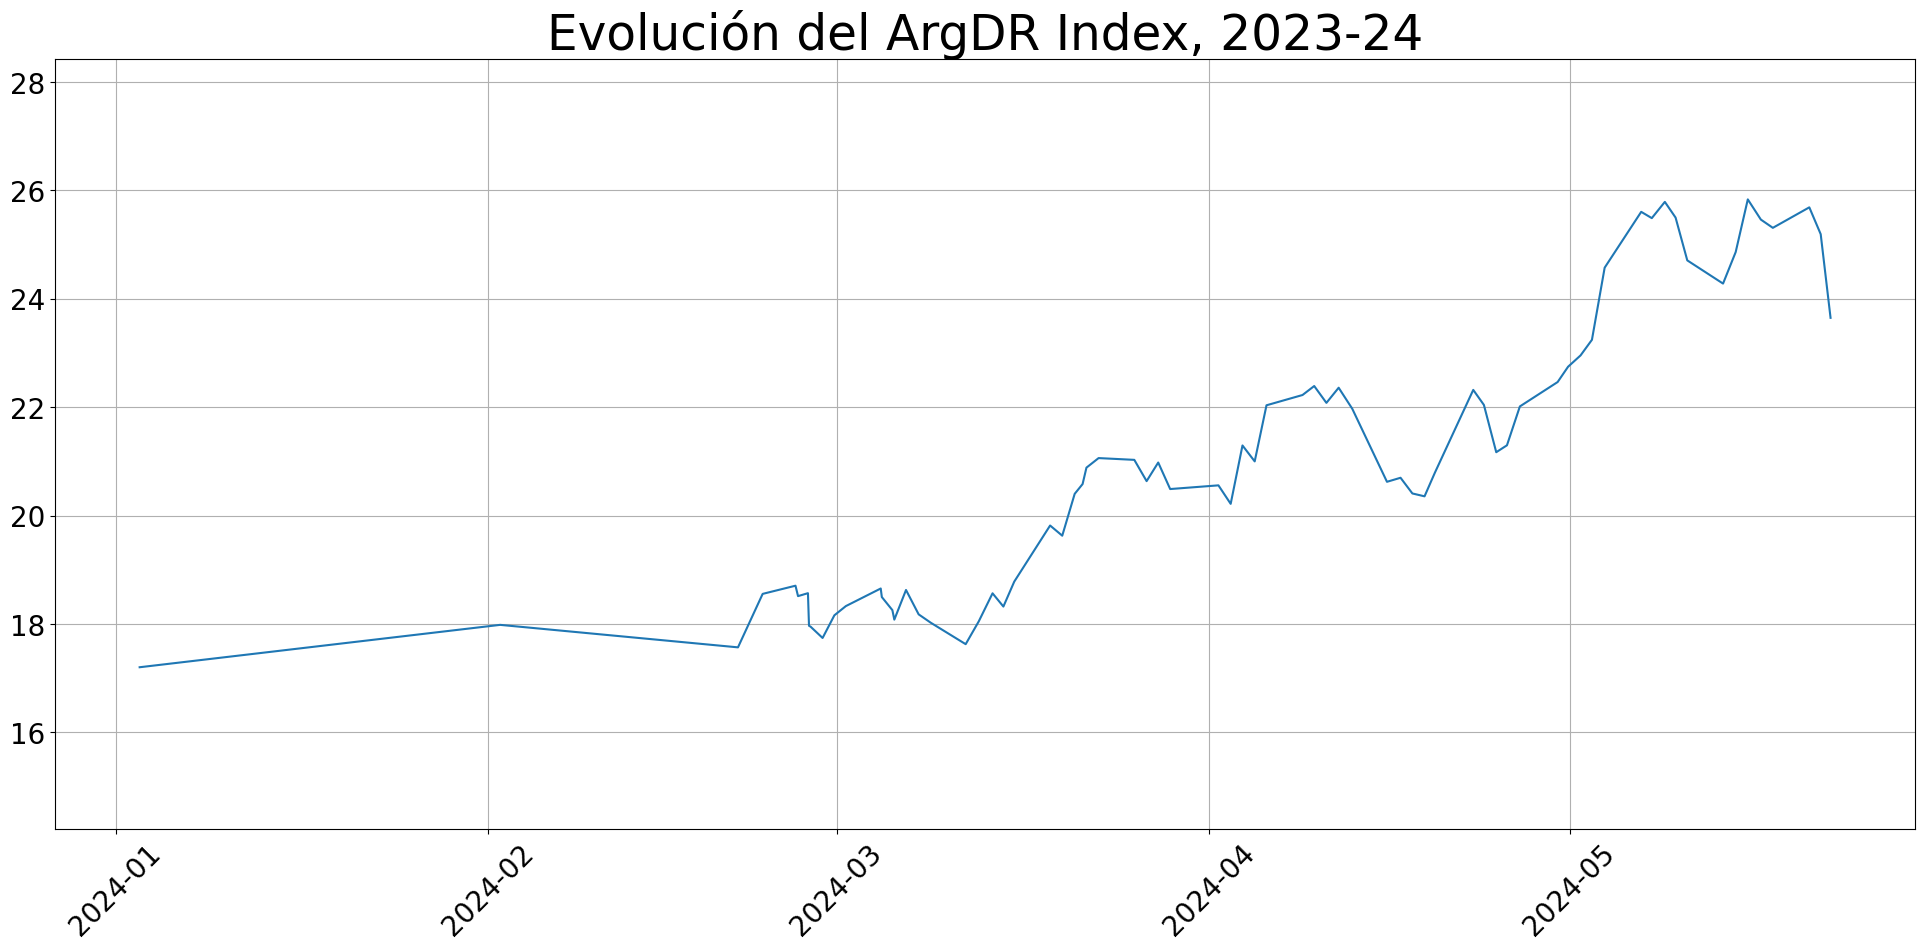

In [11]:
from matplotlib import pyplot as plt


dates = result.index
dates = pd.Series(dates)
values = result['Valor']
values = pd.Series(values)

print(values)

startdate = '2024-01-01 00:00:00'

plt.figure(figsize=(24,10))
plt.plot(dates[(dates>=startdate)], values[(values.index>=startdate)])
plt.title('Evolución del ArgDR Index, 2023-24', fontsize = 35)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20, rotation = 45)
plt.grid()
plt.ylim(values.min() * 0.9 , values.max() * 1.1)
plt.show()



In [12]:
'''
datos_xslx = pd.ExcelFile('ArgDR datos en vivo.xlsx')
datos_xslx = pd.DataFrame(datos_xslx)
'''

"\ndatos_xslx = pd.ExcelFile('ArgDR datos en vivo.xlsx')\ndatos_xslx = pd.DataFrame(datos_xslx)\n"